In [1]:
from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests'
)


In [2]:
real_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


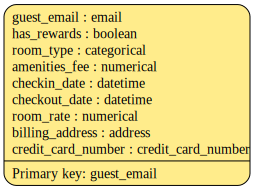

In [3]:
metadata.visualize()

In [4]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

In [5]:
synthesizer.fit(
    data=real_data
)

In [6]:
synthetic_data = synthesizer.sample(
    num_rows=500
)

synthetic_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,False,BASIC,9.752814,31 Mar 2020,19 Apr 2020,151.871782,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,steven59@example.org,False,BASIC,NaN,25 Jun 2020,14 Aug 2020,181.481346,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,brandon15@example.net,False,BASIC,22.554106,14 Apr 2020,07 Apr 2020,143.655477,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788
3,humphreyjennifer@example.net,False,BASIC,24.324111,25 May 2020,11 Jun 2020,178.353772,"9301 John Parkways\nThomasland, OH 61350",3524946844839485
4,joshuabrown@example.net,False,BASIC,20.523800,13 Nov 2019,25 Oct 2019,183.572274,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978


In [7]:
sensitive_column_names = ['guest_email', 'billing_address', 'credit_card_number']

real_data[sensitive_column_names].head(3)

,guest_email,billing_address,credit_card_number
0,michaelsanders@shaw.net,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380


In [8]:
synthetic_data[sensitive_column_names].head(3)

,guest_email,billing_address,credit_card_number
0,dsullivan@example.net,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,steven59@example.org,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,brandon15@example.net,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788


In [9]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 500.81it/s]

Overall Quality Score: 86.57%

Properties:
- Column Shapes: 91.67%
- Column Pair Trends: 81.47%


In [16]:
quality_report.get_visualization('Column Shapes')

In [11]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='amenities_fee',
    metadata=metadata
)

fig.show()

In [12]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['checkin_date', 'checkout_date'],
    metadata=metadata
)

fig.show()

In [13]:
synthesizer.save('my_synthesizer.pkl')

synthesizer = SingleTablePreset.load('my_synthesizer.pkl')

In [14]:
from sdmetrics.single_column import KSComplement

KSComplement.compute(
    real_data=real_data['room_rate'],
    synthetic_data=synthetic_data['room_rate']
)

0.836

In [15]:
from sdmetrics.reports import utils

metadata_dict = metadata.to_dict()

fig = utils.get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='amenities_fee',
    metadata=metadata_dict
)

fig.show()

In [17]:
quality_report.get_visualization('Column Pair Trends')